### ДЗ-2. Матстат. Богоявленский Максим, БЭК211

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", palette="muted")

#### Задача 1
Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе впервые приехал таксист, который уже раньше приезжал к туристу. Для упрощения предположим, что все n таксистов Самарканда всегда на работе и приезжают равновероятно.

а) [5] Постройте график функции правдоподобия как функции от общего количества такси n. Найдите оценку числа n методом максимального правдоподобия.

In [4]:
k = 10
ll=[]
for i in range(1, 1001):
    l = 1
    for j in range(1, k-1):
        l *= (i-j)/i
    l *= (k-1)/i
    ll.append(l)

Text(0.5, 1.0, 'оценка по ML:42')

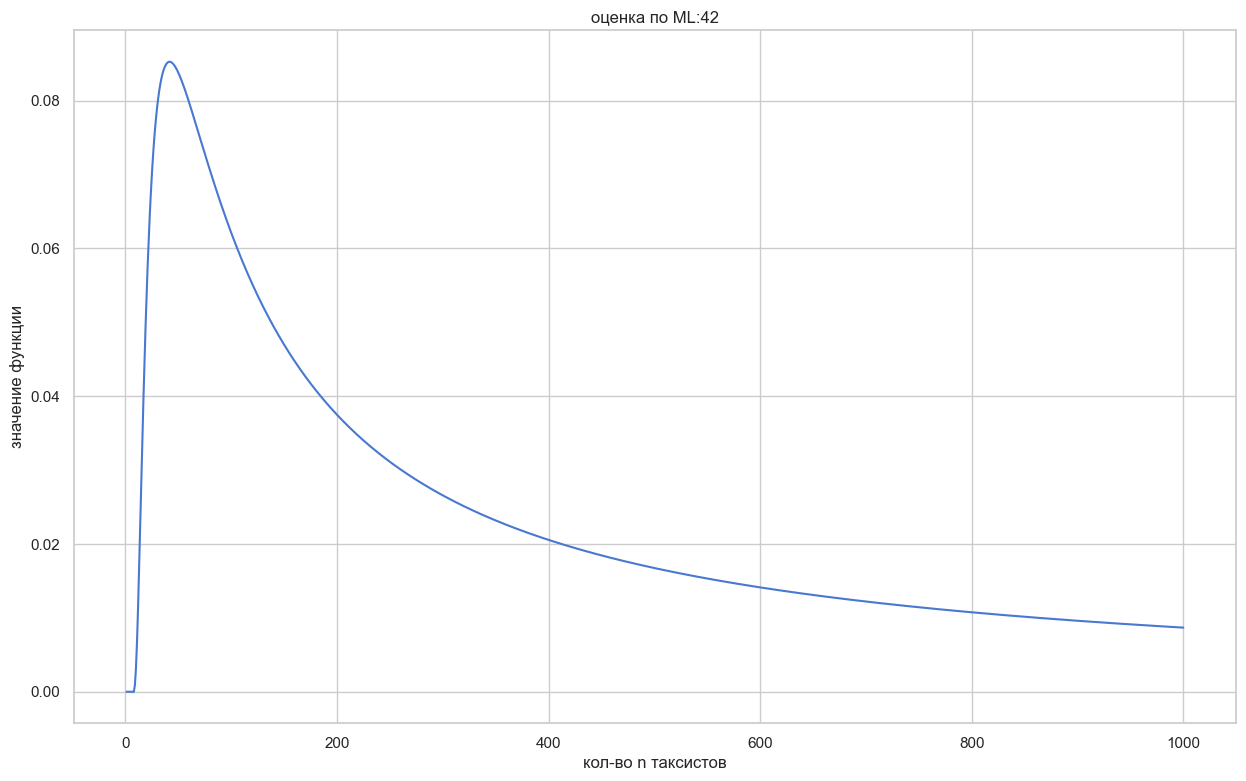

In [10]:
plt.figure(figsize = (15, 9))
plt.plot(list(range(1, 1001)), ll)
plt.xlabel('кол-во n таксистов')
plt.ylabel('значение функции')
plt.title('оценка по ML:'+ str(np.argmax(ll)+1))

б) [5] Постройте график математического ожидания номера заказа, на котором происходит первый повторный приезд, как функции от общего количества такси n. Найдите оценку числа n методом моментов.

In [12]:
ee=[]
for i in range(1, 1001):
    e = 0
    for k in range(1, 1001):
        l = 1
        if k == 1:
            l = 1
        else:
            for j in range(1, k-1):
                l *= (i-j)/i
            l *= (k-1)/i
            e+=(k*l)
    ee.append(e)

Text(0.5, 1.0, 'оценка по MM:55')

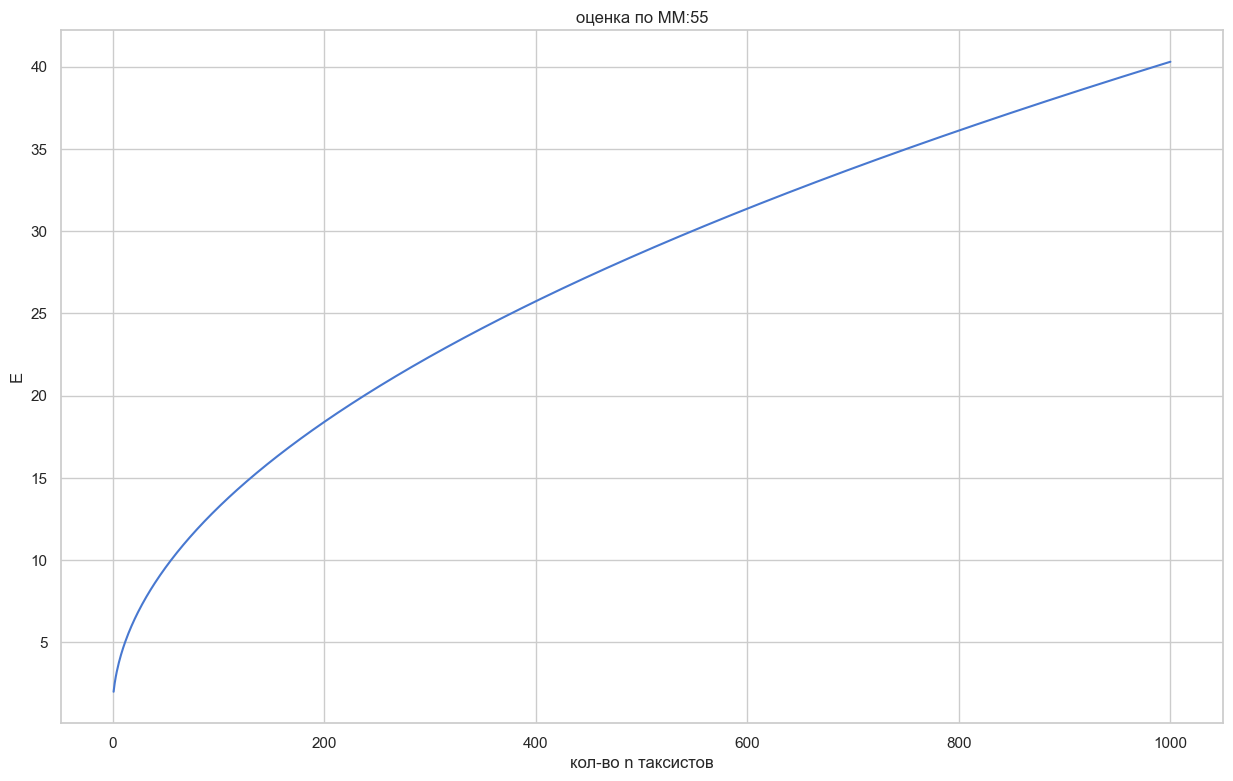

In [20]:
plt.figure(figsize = (15, 9))
plt.plot(list(range(1, 1001)), ee)
plt.xlabel('кол-во n таксистов')
plt.ylabel('E')
plt.title('оценка по MM:'+ str(np.argmin(abs(np.array(ee)-10))+1))

#### Задача 3
Иноагент Иннокентий по 20 наблюдениям строит 95%-й доверительный интервал для мате- матического ожидания несколькими способами: классический асимптотический нормальный интервал, с помощью наивного бутстрэпа, с помощью бутстрэпа t-статистики.

In [145]:
np.random.seed(123435)
innoe = stats.expon.rvs(scale=1, size=(10000, 20))
innot = t.rvs(df=3, size=(10000, 20))

а) [15]Для каждого способа с помощью 10000 симуляций оцените вероятность того,что номинально 95%-й доверительный интервал фактически накрывает математическое ожидание, если наблюдения распределены экспоненциально с интенсивностью 1.

In [146]:
c = 0
for i in range (10000):
    di = stats.norm.interval(1 - .05, loc=np.mean(innoe[i]), scale=np.std(innoe[i],ddof=1)/np.sqrt(20))
    if di[0] <= 1 <= di[1]:
        c+=1
print('классический ассимтотический ДИ:', c/10000)

классический ассимтотический ДИ: 0.9029


In [148]:
np.random.seed(123435)
c = 0
for i in innoe:
    boot = np.random.choice(i.flatten(), size=(10000, 20), replace=True)
    bm = np.mean(boot, axis = 1)
    di = np.percentile(bm, [2.5, 97.5])
    if di[0] <= 1 <= di[1]:
        c += 1
print('наивный бутстрап:', c/10000)

наивный бутстрап: 0.9016


In [149]:
np.random.seed(123435)
c = 0
mm = np.mean(innoe)
sstd = np.std(innoe)
for i in innoe:
    boot = np.random.choice(i.flatten(), size=(10000, 20), replace=True)
    bm = np.mean(boot, axis = 1)
    bstd = np.std(boot, axis = 1, ddof = 1)
    ts = (bm - mm)/ (bstd/np.sqrt(20))
    di = mm - np.percentile(ts, [97.5, 2.5]) * (sstd / np.sqrt(20))
    if di[0] <= 1 <= di[1]:
        c += 1
print('бутстрап t-статистики:', c/10000)

бутстрап t-статистики: 0.901


б) [5] Пересчитайте вероятности накрытия,если наблюдения имеют распределение Стьюдента с тремя степенями свободы.

In [150]:
c = 0
for i in range (10000):
    di = stats.norm.interval(1 - .05, loc=np.mean(innot[i]), scale=np.std(innot[i],ddof=1)/np.sqrt(20))
    if di[0] <= 0 <= di[1]:
        c+=1
print('классический ассимтотический ДИ:', c/10000)

классический ассимтотический ДИ: 0.9459


In [151]:
np.random.seed(123435)
c = 0
for i in innot:
    boot = np.random.choice(i.flatten(), size=(10000, 20), replace=True)
    bm = np.mean(boot, axis = 1)
    di = np.percentile(bm, [2.5, 97.5])
    if di[0] <= 0 <= di[1]:
        c += 1
print('наивный бутстрап:', c/10000)

наивный бутстрап: 0.9231


In [152]:
np.random.seed(123435)
c = 0
mm = np.mean(innot)
sstd = np.std(innot)
for i in innot:
    boot = np.random.choice(i.flatten(), size=(10000, 20), replace=True)
    bm = np.mean(boot, axis = 1)
    bstd = np.std(boot, axis = 1, ddof = 1)
    ts = (bm - mm)/ (bstd/np.sqrt(20))
    di = mm - np.percentile(ts, [97.5, 2.5]) * (sstd / np.sqrt(20))
    if di[0] <= 0 <= di[1]:
        c += 1
print('бутстрап t-статистики:', c/10000)

бутстрап t-статистики: 0.9234


в) [5] Какой способ оказался лучше?

Для обоих распределений - классический ассимпт дов интервал.

#### Задача 4

Проверьте гипотезу о том, что ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны. В качестве альтернатив- ной гипотезы возьмите гипотезу о неравенстве.

In [58]:
ex = pd.read_csv("/Users/a1111/Desktop/mst.csv", sep=',')
df = ex[['Last name','Unnamed: 72']]
df = df.dropna()
df = df.reset_index()
df = df[['Last name','Unnamed: 72']]
df.columns = ['sur','res']

In [88]:
gla = ['А', 'Е', 'Ё', 'И', 'О', 'У', 'Ы', 'Э', 'Ю', 'Я']
ind = 0
a = []
b = []
for el in np.array(df['sur']):
    if el[0] in gla:
        a.append(ind)
    else:
        b.append(ind)
    ind+=1
gl = (df.loc[np.array(a)])['res']
so = (df.loc[np.array(b)])['res']

а) [5] Используйте тест Уэлча. - HO не отвергается

In [95]:
ttest_ind(gl,so,equal_var=False)

Ttest_indResult(statistic=-0.8519661870595602, pvalue=0.3974027153843839)

б) [5] Используйте наивный бутстрэп. - HO не отвергается

In [153]:
np.random.seed(123435)
mboot = []
mn = np.mean(gl) - np.mean(so)
for i in range(10000):
    sgl = np.random.choice(gl, size=len(gl), replace=True)
    sso = np.random.choice(so, size=len(so), replace=True)
    mboot.append(np.mean(sgl) - np.mean(sso))
pv = (np.abs(mboot) >= np.abs(mn)).mean()
pv

0.5365

в) [5] Используйте бутстрэп t-статистики. - HO не отвергается

In [154]:
np.random.seed(123435)
mn = np.mean(gl) - np.mean(so)
mstd = np.std(gl) - np.std(so)
ts = mn / np.sqrt(mstd**2 / len(gl) + mstd**2 / len(so))
tboot = []
for i in range(10000):
    sgl = np.random.choice(gl, size=len(gl), replace=True)
    sso = np.random.choice(so, size=len(so), replace=True)
    bm = np.mean(sgl) - np.mean(sso)
    bs = np.std(sgl) - np.std(sso)
    bts = bm / np.sqrt(bs**2 / len(sgl) + bs**2 / len(sso))
    tboot.append(bts)
pv = (np.abs(tboot) >= np.abs(ts)).mean()
pv

0.3143

г) [5] Используйте перестановочный тест. - HO не отвергается

In [155]:
np.random.seed(123435)
mn = np.mean(gl) - np.mean(so)
sogl = list(so) + list(gl)
sr = []
for i in range(10000):  
    np.random.shuffle(sogl)
    pgl = sogl[:len(gl)]
    pso = sogl[len(gl):]
    sr.append(np.mean(pgl) - np.mean(pso))
pv = (np.abs(sr) >= np.abs(mn)).mean()
pv

0.38

#### Задача 5
Составьте таблицу сопряжённости, поделив студентов писавших экзамен на четыре группы по двум признакам: набрал ли больше медианы или нет, на согласную или гласную букву начи- нается фамилия.

In [105]:
df['res'].median()

17.5

In [107]:
g1 = len(np.where(gl > 17.5)[0])
g2 = len(np.where(gl <= 17.5)[0])
g3 = len(np.where(so > 17.5)[0])
g4 = len(np.where(so <= 17.5)[0])

In [108]:
g1,g2,g3,g4

(21, 28, 145, 138)

а) [5]Постройте 95% асимптотический интервал для отношения шансов хорошо написать экзамен («несогласных» к «согласным»). Проверьте гипотезу о том, что отношение шансов равно 1 и укажите P-значение. - H0 не отвергается

In [118]:
r = (g3 * g2) / (g4 * g1)
lr = math.log(r)
se = math.sqrt((1 / g3) + (1 / g4) + (1 / g1) + (1 / g3))
zs = (lr - 0) / se
lf,ri = np.exp(np.log(r) - 1.96 * se),np.exp(lr + 1.96 * se)
pv = 2 * (1 - norm.cdf(abs(zs)))
print('95% ДИ', lf,ri)
print("р-value", pv)

95% ДИ 0.8382723692551234 2.3413705610557036
р-value 0.19818415859808391


б) [5] Постройте 95% асимптотический интервал для отношения вероятностей хорошо напи- сать экзамен. Проверьте гипотезу о том, что отношение вероятностей равно 1 и укажите P-значение. - H0 не отвергается

In [117]:
r = (g3 / (g3 + g4)) / (g1 / (g1 + g2))
lr = math.log(r)
se = math.sqrt((1 / (g3 + g4)) + (1 / (g1 + g2)))
zs = (lr - 0) / se
lf,ri = np.exp(np.log(r) - 1.96 * se),np.exp(lr + 1.96 * se)
pv = 2 * (1 - norm.cdf(abs(zs)))
print('95% ДИ', lf,ri)
print("р-value", pv)

95% ДИ 0.8827719576818895 1.619079504464307
р-value 0.24843407914401494


в) [5] Постройте 95% интервал для отношения шансов хорошо написать экзамен с помощью наивного бутстрэпа. Проверьте гипотезу о том, что отношение шансов равно 1 и укажите P-значение. - H0 не отвергается

In [156]:
np.random.seed(123435)
rr = []
for i in range(10000):
    rdf = df.sample(frac=1, replace=True)
    ind = 0
    a = []
    b = []
    for el in np.array(rdf['sur']):
        if el[0] in gla:
            a.append(ind)
        else:
            b.append(ind)
        ind+=1
    gln = np.array(rdf['res'])[a]
    son = np.array(rdf['res'])[b]
    g1n = len(np.where(gln > 17.5)[0])
    g2n = len(np.where(gln <= 17.5)[0])
    g3n = len(np.where(son > 17.5)[0])
    g4n = len(np.where(son <= 17.5)[0])
    rr.append((g3n / g4n) / (g1n / g2n) )
di = np.percentile(rr, [2.5,97.5])
r = ((g1n / g2n) / (g3n / g4n))
pv = (np.abs(np.array(rr) - 1) >= np.abs(r - 1)).mean()
print("95% ДИ", di)
print("р-value", pv)

95% ДИ [0.75249172 2.6785856 ]
р-value 0.3468


#### Задача 6

Иноагент Иннокентий Вероятностно-Статистический считает,что длина фамилии положительно влияет на результат экзамена по теории вероятностей. А именно, он предполагает, что ожи- даемый результат за экзамен прямо пропорционален длине фамилии, E(Yi) = βFi, где Yi — результат за экзамен по 30-балльной шкале, Fi — количество букв в фамилии.

а) [10] Оцените β методом моментов. Рассчитайте выборочную корреляцию.

In [132]:
lensp = []
for el in df['sur']:
    lensp.append(len(el))
print("оценка беты", df['res'].mean() / np.array(lensp).mean())
print("выборочная корреляция", np.corrcoef(df['res'],lensp)[0][1])

оценка беты 2.0613026819923372
выборочная корреляция 0.025328052669147665


б) [5] С помощью перестановочного теста найдите P-значение и формально протестируйте
гипотезу о том, что корреляция равна нулю. - H0 отвергается, корр равна нулю

In [157]:
np.random.seed(123435)
cors = []
for i in range(3000):
    lensp = np.random.permutation(np.array(lensp))
    cor = np.corrcoef(df['res'],lensp)[0][1]
    cors.append(cor)
p_value = (np.abs(cors) >= np.abs(np.corrcoef(df['res'],lensp)[0][1])).mean()
print("p-value", p_value)

p-value 0.921


#### Задача 7


#### 11.11 из файла с задачами

Пусть X1, . . . , Xn — случайная выборка из нормального распределения с известным матема-
тическим ожиданием μ = 1 и неизвестной дисперсией σ2.

Объем выборки n = 16. Тестируются основная гипотеза H0 : σ2 = 4 против альтернативной гипотезы Ha : σ2 = 9. С помощью леммы Неймана–Пирсона найдите наиболее мощный критерий, имеющий уровень значимости α = 0.05.

#### ГПТ:

Для нахождения наиболее мощного критерия с использованием леммы Неймана-Пирсона необходимо найти отношение правдоподобия и построить соответствующую статистику.

Правдоподобие для данной выборки из нормального распределения с известным математическим ожиданием μ и неизвестной дисперсией σ^2 выглядит следующим образом:

L(σ^2) = (1/√(2πσ^2))^n * exp[-(1/2σ^2) * Σ(xi - μ)^2]

где xi - значения выборки, n - объем выборки.

Рассмотрим отношение правдоподобия:

λ = L(σ^2 = 4) / L(σ^2 = 9)

λ = [(1/√(8π))^16 * exp[-(1/8) * Σ(xi - 1)^2]] / [(1/√(18π))^16 * exp[-(1/18) * Σ(xi - 1)^2]]

Упростим это выражение:

λ = (2/3)^16 * exp[(1/72) * Σ(xi - 1)^2]

Теперь нам нужно построить статистику, основанную на отношении правдоподобия. В соответствии с леммой Неймана-Пирсона, статистика имеет вид:

T = Σ(xi - 1)^2

Теперь мы можем построить критическую область. Уровень значимости α = 0.05 соответствует значению критерия, при котором вероятность отклонения гипотезы H0 равна α.

Пусть c - такое значение, что P(T > c | H0) = α.

Тогда критическая область имеет вид T > c.

Чтобы найти это значение c, нам нужно использовать известное распределение хи-квадрат (χ^2) для выборки объемом n = 16 и заданного уровня значимости α = 0.05. Для этого найдем квантиль хи-квадрат распределения с (1 - α) процентным уровнем доверия:

χ^2(1 - α, n - 1) = χ^2(0.95, 15)

Находим значение χ^2(0.95, 15) в таблице или с помощью программы и получаем, что оно равно приблизительно 26.296.

Таким образом, наш критерий имеет вид: T > 26.296.

Итак, наиболее мощным критерием, имеющим уровень значимости α = 0.05, будет отклонение основной гипотезы H0 в пользу альтернативной гипотезы Ha, если значение статистики T (сумма квадратов отклонений от среднего) превышает 26.296.

#### Задача 8

В основном - семинары, и в целом курс, Фила Ульянкина. (https://github.com/hse-econ-data-science/andan_2023)

Помогли осознать на практике и тервер, и матстат, как в жизни работают распределения, метрики, оценки и тд.